In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [391]:
def load_auto():

    # import data
    Auto = pd.read_csv('Auto.csv', na_values='?', dtype={'ID': str}).dropna().reset_index()

    # Extract relevant data features
    X_train = Auto[['cylinders','displacement','horsepower','weight', 'acceleration','year','origin']].values
    #X_train = Auto[['horsepower'].values
    Y_train = Auto[['mpg']].values

    return X_train, Y_train

In [392]:
class Linear_regression():    
    
    def __init__(self, dim):
        self.w = np.array([0.0]*dim).reshape(dim,1)
        self.dim = dim
        #self.w[0] = 60.0
        
    def forward(self,x_data):
        #z = np.array([0]*len(x_data))
        #for i, xi in enumerate(x_data):
        #    z[i] = self.w[0] * xi + self.b
        #return z
        
        ones_column = np.ones((len(x_data),1))
        x_matrix = np.hstack((ones_column,x_data))
        z = np.matmul(x_matrix, self.w)
        return z
        
    def compute_cost(self, y, z):
        L = (y-z)**2
        J = sum(L)/len(L)
        return J
    
    def backward(self, x, y, z):
        #dJdz = (2/len(y))* sum(y-z)
        #dzdb = 1        
        #dJdw = dJdz*dzdw
        #dJdb = dJdz*dzdb
      
        #dJdw = np.array([0]*1)

        n = len(y)        
        dJdw = (-2/n)* sum((y-z)*x)
        dJdb = (-2/n)* sum(y-z)
        
        return [dJdw, dJdb]
    
    def update_parameters(self, dJdw, dJdb, lr):
        self.w[0] -= lr*dJdb
        for i in range(self.dim-1):
            self.w[i+1] -= lr*dJdw[i]
        
        
    def predict(self,x):
        return self.forward(x)
        
    def train_linear_model(self, x_data, y_data, learning_rate, iterations):
        J = [None]*iterations
        for i in range(iterations):
            z = self.forward(x_data)
            #print('z ', z)
            #print(x_data)
            #print(self.w)
            J[i] = self.compute_cost(y_data, z)
            [dJdw, dJdb] = self.backward(x_data,y_data,z)
            #print(dJdw, dJdb)
            self.update_parameters(dJdw, dJdb, learning_rate)
            #print(self.w)
        
        #xx = np.linspace(min(x_data),max(x_data),len(y_data)).reshape(len(y_data),1)
        #m = self.predict(xx)          
        #plt.plot(x_data,y_data,'ro', label='input')
        #plt.plot(xx,m, label='model')   
        print(J[iterations-1])
        plt.plot(J)        

[11.61643228]


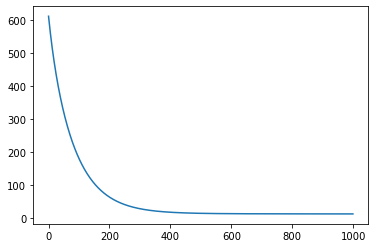

In [396]:
#AUTO DATA

x,y = load_auto()

x_data = np.array(x)
y_data = np.array(y)

mean = np.mean(x_data, axis=0)
std = np.std(x_data, axis=0)
x_d = (x_data - mean) / std

input_dimensions = x_d.shape[1]

model = Linear_regression(dim = input_dimensions+1)

lr = 0.003
iterations = 1000

model.train_linear_model(x_d,y_data,lr,iterations)

In [168]:
## TEST DATA
model = Linear_regression(3)
x = np.array([[1,1],[1,3],[2,5],[1,6],[2,7]])
#x = np.array([1,2,3,4,5])
y = np.array([[4],[5],[6],[6],[7]])
lr = 0.03
iterations = 100

#model.train_linear_model(x,y,lr,iterations)

In [12]:
[0]*1

[0]

In [43]:
a = np.array([1,2,3])
b = np.array([1,2,3])
(a + b)**2

array([ 4, 16, 36], dtype=int32)

In [46]:
a = np.array([1,2,3])
a[1] = 3
a

array([1, 3, 3])

In [79]:
M1 = np.array([5, 3])
M2 = np.array([[1],[2]])
print(M1.shape, M2.shape)
M1.dot(M2)

(2,) (2, 1)


array([11])

In [92]:
w = np.array([2]*2) 
w.dot(x_data[1]) 

1030.0